In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display, HTML

import statsmodels.api as sm

from sklearn.preprocessing import (
    PowerTransformer,
    OneHotEncoder,
    StandardScaler
)
# import eda_helper_functions as eda

In [ ]:
# !pip3 install --upgrade pandas!
# !pip install --force-reinstall statsmodels==0.14.0 pydeseq2==0.4.3
# !pip install --upgrade matplotlib


# !pip install --upgrade seaborn/

In [3]:
## Read the training data

file_path = r"/content/train.csv"

train = pd.read_csv(file_path)

train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Vistara,2019-04-21,Banglore,Delhi,11:30:00,14:20:00,170,0.0,No Info,5403
1,GoAir,2019-04-01,Kolkata,Banglore,16:40:00,00:15:00,455,1.0,No Info,5171
2,IndiGo,2019-04-15,Kolkata,Banglore,15:30:00,18:05:00,155,0.0,No Info,4174
3,Jet Airways,2019-03-27,Delhi,Cochin,19:10:00,19:45:00,1475,2.0,In-flight meal not included,8834
4,Air India,2019-03-03,Banglore,New Delhi,06:10:00,08:55:00,165,0.0,No Info,7591


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

-- fix the data type of `date_of_journey`, `dep_time` and `arrival_time` to datetime datatype

In [6]:
train = train.assign(**{col: pd.to_datetime(train.loc[:, col], dayfirst = True, format = "mixed")
                        for col in ["date_of_journey", "dep_time", "arrival_time"]
                    })

In [7]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [8]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Vistara,2019-04-21,Banglore,Delhi,2024-06-04 11:30:00,2024-06-04 14:20:00,170,0.0,No Info,5403
1,GoAir,2019-04-01,Kolkata,Banglore,2024-06-04 16:40:00,2024-06-04 00:15:00,455,1.0,No Info,5171
2,IndiGo,2019-04-15,Kolkata,Banglore,2024-06-04 15:30:00,2024-06-04 18:05:00,155,0.0,No Info,4174
3,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-04 19:10:00,2024-06-04 19:45:00,1475,2.0,In-flight meal not included,8834
4,Air India,2019-03-03,Banglore,New Delhi,2024-06-04 06:10:00,2024-06-04 08:55:00,165,0.0,No Info,7591
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-03-03,Mumbai,Hyderabad,2024-06-04 21:05:00,2024-06-04 22:25:00,80,0.0,No Info,4937
636,Jet Airways,2019-06-06,Kolkata,Banglore,2024-06-04 09:35:00,2024-06-04 21:05:00,690,1.0,In-flight meal not included,13469
637,Multiple carriers,2019-06-01,Delhi,Cochin,2024-06-04 08:45:00,2024-06-04 19:15:00,630,1.0,No Info,10261
638,Multiple carriers,2019-03-27,Delhi,Cochin,2024-06-04 07:30:00,2024-06-04 19:15:00,705,1.0,No Info,9100


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [10]:
train.describe(include = 'number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,634.203125,0.812500,9070.089062
std,515.725242,0.684617,4437.710149
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5227.000000
50%,490.000000,1.000000,8438.500000
75%,916.250000,1.000000,12729.750000
max,2295.000000,3.000000,36983.000000


In [11]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include = 'O')
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,235,277,277,333.0,499


In [12]:
## High level anaysis of missing values
def missing_info(data):
    na_cols = [col for col in data.columns if data[col].isna().any()]
    na_counts = [data[col].isna().sum() for col in na_cols]
    na_pct = [(data[col].isna().mean()*100) for col in na_cols]

    return (
        pd
        .DataFrame( data = {
            "variable" : na_cols,
            "count" : na_counts,
            "percentage" : na_pct
        }
        )
        .sort_values(by = "count", ascending = False)
        .set_index("variable")
    )

In [13]:
missing_info(train)

,count,percentage
variable,,


In [15]:
## Lets check missing function on Titanic dataset

# titanic = pd.read_csv(r"G:\My Drive\Personal Projects\1. Flight prediction system\data\titanic_train.csv")
# missing_info(titanic)



In [16]:
## Plot_missing_values
def rotate_xlabels(ax, angle = 35):
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = angle,
        ha = "right"
    )


In [17]:
def rotate_ylabels(ax, angle = 35):
    ax.set_xticklabels(
        ax.get_yticklabels(),
        rotation = angle,
        ha = right
    )

In [18]:
def plot_missing_info(data, figsize = (10, 4)):
    na_data = missing_info(data)
    fig, ax = plt.subplots(1, 1, figsize = figsize)
    bar = ax.bar(
        range(len(na_data)),
        height = na_data["count"].values,
        color = "#1eba47",
        edgecolor = "black",
        tick_label = na_data.index.to_list(),
        alpha = 0.7
    )

#     ax.bar_label(
#         bar,
#         **bar_label_params
#     )

    ax.set(
        xlabel = "Variable",
        ylabel = "Count",
        title = "Missing Data Counts per variable"
    )

    rotate_xlabels(ax)
    plt.tight_layout()
    plt.show()

In [20]:
# plot_missing_info(titanic)

# High level analysis of outliers

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
forest = IsolationForest(n_estimators = 10, random_state = 42)



In [23]:
(
    train
    .assign(outliers = forest.fit_predict(
        train
        .drop(columns = "price")
        .select_dtypes(include = "number")
    ))
    .query("outliers == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outliers
3,Jet Airways,2019-03-27,Delhi,Cochin,2024-06-04 19:10:00,2024-06-04 19:45:00,1475,2.0,In-flight meal not included,8834,-1
7,Jet Airways,2019-06-09,Kolkata,Banglore,2024-06-04 06:30:00,2024-06-04 04:40:00,1330,1.0,No Info,14178,-1
9,Jet Airways,2019-03-06,Banglore,New Delhi,2024-06-04 11:40:00,2024-06-04 09:30:00,1310,1.0,No Info,17261,-1
12,Jet Airways,2019-05-21,Kolkata,Banglore,2024-06-04 06:30:00,2024-06-04 09:20:00,1610,1.0,In-flight meal not included,9663,-1
17,Jet Airways,2019-06-12,Delhi,Cochin,2024-06-04 06:45:00,2024-06-04 04:25:00,1300,2.0,In-flight meal not included,10919,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Air India,2019-04-09,Delhi,Cochin,2024-06-04 05:55:00,2024-06-04 19:15:00,2240,2.0,No Info,7711,-1
629,IndiGo,2019-05-24,Kolkata,Banglore,2024-06-04 15:10:00,2024-06-04 20:30:00,320,1.0,No Info,6991,-1
634,IndiGo,2019-06-15,Delhi,Cochin,2024-06-04 15:10:00,2024-06-04 20:00:00,290,1.0,No Info,6147,-1
635,Air India,2019-03-03,Mumbai,Hyderabad,2024-06-04 21:05:00,2024-06-04 22:25:00,80,0.0,No Info,4937,-1


In [24]:
# len(train.columns)

## Plot pair plots

In [25]:
def pair_plots(data, height = 3, aspect = 1.5, hue = None, legend = False):
    pair_grid = sns.PairGrid(
        data = data,
        aspect = aspect,
        height = height,
        hue = hue,
        corner = True
    )

    pair_grid.map_lower(sns.scatterplot)

    if legend:
        pair_grid.add_legend()


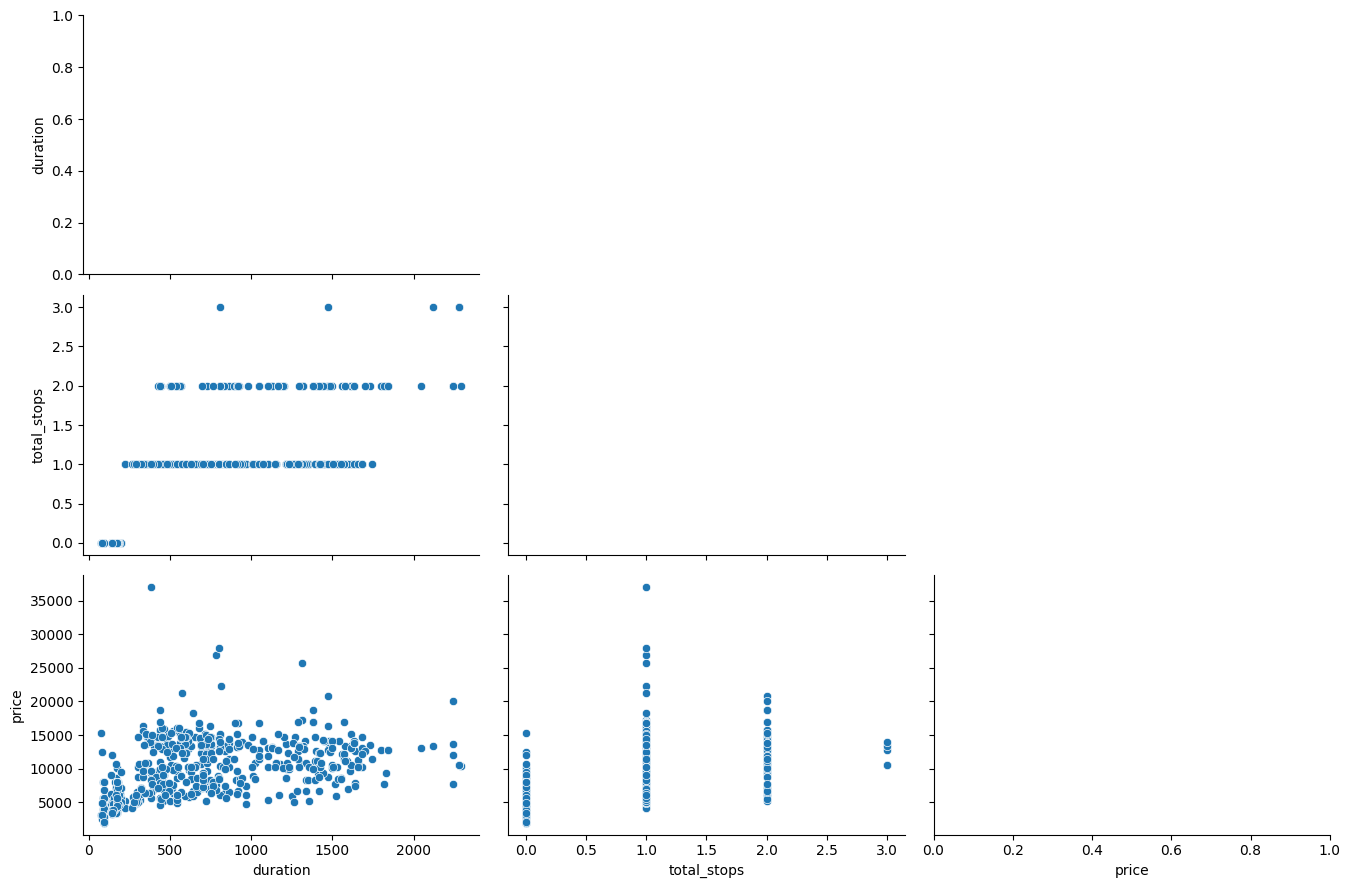

In [26]:
pair_plots(train)

## Correlation Analysis

In [27]:
def correlation_heatmap(data, figsize = (12,6), method = "spearman", cmap = "RdBu"):
    cm = data.corr(method = method, numeric_only = True)

    mask = np.zeros_like(cm, dtype = bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize = figsize)
    hm = sns.heatmap(
        cm,
        vmin = -1,
        vmax = 1,
        cmap = cmap,
        center = 0,
        annot = True,
        fmt = ".2f",
        linewidths = 1.5,
        square = True,
        mask = mask,
        ax = ax
    )

    ax.set(title = f"{method.title()} Correlation Matrix Heatmap")

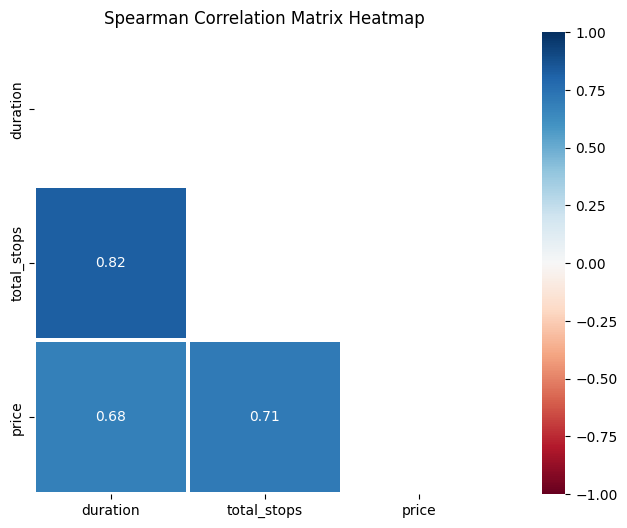

In [28]:
correlation_heatmap(train)

In [29]:
def cramers_v(data, var1, var2):
    ct = pd.crosstab(
        data.loc[:, var1],
        data.loc[:, var2]
    )

    r, c = ct.shape
    n = ct.sum().sum()
    chi2 =  stats.chi2_contingency(ct)[0]
    phi2 = chi2 / n

    phi2_ = max(0, phi2  - ((r-1)*(c-1) / (n-1)))
    r_ = r - (((r-1)**2) / (n-1))
    c_ = c - (((c-1)**2) / (n-1))

    return np.sqrt(phi2_ / min(r_ -1, c_ -1))

In [30]:
## CramersV_heatmap

def cramerV_heatmap(data, figsize = (12, 6),  cmap = "Blues"):
    cols = data.select_dtypes(include = "O").columns.to_list()

    matrix =(
        pd
        .DataFrame(data = np.ones((len(cols), len(cols))))
        .set_axis(cols, axis = 0)
        .set_axis(cols, axis = 1)
    )

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                matrix.loc[col1, col2] = cramers_v(data, col1, col2)

    mask = np.zeros_like(matrix, dtype = bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize = figsize)
    hm = sns.heatmap(
        matrix,
        vmin = 0,
        vmax = 1,
        cmap = cmap,
        annot = True,
        fmt = ".2f",
        square = True,
        linewidths = 1.5,
        mask = mask,
        ax = ax
    )
    ax.set(title = "Cramer's V Correlation Matrix Heatmap")


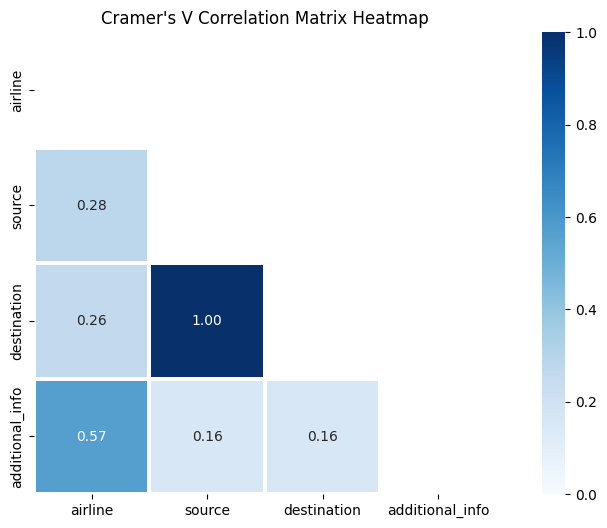

In [31]:
cramerV_heatmap(train)

# Detailed Analysis

## 1. Airline column

In [32]:
train.airline

0                Vistara
1                  GoAir
2                 IndiGo
3            Jet Airways
4              Air India
             ...        
635            Air India
636          Jet Airways
637    Multiple carriers
638    Multiple carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

In [33]:
def display_html(size = 3, content = "content"):
    display(HTML(f"<h{size}>{content}</h{size}"))

In [34]:
import warnings
warnings.filterwarnings("ignore")
def cat_summary(data, var):
    col = data.loc[:, var].copy()
    display_html(2, var)

    display_html(3, "Quick Glance")
    display(col)

    display_html(3, "Meta-Data:")
    print(f"{'Data type':15} : {col.dtype}")
    print(f"{'Cardinality':15} : {col.nunique(dropna = True)} categories")
    print(f"{'Missing Data':15} : {col.isna().sum():,} rows({col.isna().mean()*100:.2f} %) ")
    print(f"{'Avalaible Data':15} : {col.count():,}/ {len(col):,} rows")

    display_html(3, "Summary:")
    display(
        col
        .describe()
        .rename("")
        .to_frame()
    )

    display_html(3, "Categories Distribution: ")
    with pd.option_context("display.max_rows", None):
        display(
            col
            .value_counts()
            .pipe(lambda ser: pd.concat(
                [
                    ser,
                    col.value_counts(normalize = True)
                ],
                axis = 1
            ))
            .set_axis(["Count","percentage"], axis = 1)
            .rename_axis(index = "category")
        )

In [35]:
cat_summary(train, "airline")

0                Vistara
1                  GoAir
2                 IndiGo
3            Jet Airways
4              Air India
             ...        
635            Air India
636          Jet Airways
637    Multiple carriers
638    Multiple carriers
639          Jet Airways
Name: airline, Length: 640, dtype: object

Data type       : object
Cardinality     : 8 categories
Missing Data    : 0 rows(0.00 %) 
Avalaible Data  : 640/ 640 rows


,
count,640
unique,8
top,Jet Airways
freq,235


,Count,percentage
category,,
Jet Airways,235,0.367188
IndiGo,114,0.178125
Air India,114,0.178125
Multiple carriers,76,0.118750
SpiceJet,52,0.081250
Vistara,22,0.034375
Air Asia,16,0.025000
GoAir,11,0.017188


In [36]:
def bar_chart(counts, color, ax):
    barplot = ax.bar(
        x = range(len(counts)),
        height = counts.values,
        tick_label = counts.index,
        color = color,
        edgecolor = "black",
        alpha = 0.7
    )

#     ax.bar_label(
#         barplot, padding = 5, color = "black"
#     )

    ax.set(title= "Barchart", xlabel = "Categories", ylabel = "Count")

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")

In [37]:
def pie_chart(counts, colors, ax):
    pie = ax.pie(
        counts.values,
        labels = counts.index,
        autopct = "%.2f%%",
        colors = colors,
        wedgeprops = dict(alpha = 0.7, edgecolor = "black")
    )

    ax.set_title("Pie Chart")

    ax.legend(
        loc = "upper left",
        bbox_to_anchor = (1.02, 1),
        title = "Categories",
#         title_fontproperties = dict(weight = "bold", size = 10)
    )

    plt.setp(pie[2], weight = "bold", color = "white")


In [44]:
## Univariate analysis

def cat_univar_plots(data, var, k= None, order = None, show_wordcloud = True, figsize = (12, 8.5)):
    display_html(2, f"Univariate Analysis of {var}")
    display_html(content = "")

    fig = plt.figure(figsize = figsize)
    gs = GridSpec(2, 2, figure = fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 0])

    if k is None:
        counts = (data.loc[:, var].value_counts().reindex(index = order))

    else:
        temp = get_top_k(data, var, k=k)
        counts = (temp.loc[:, var].value_counts())

    colors = [tuple(np.random.choice(256, size =3)/ 255) for _ in range(len(counts)) ]


    bar_chart(counts, colors, ax1)

    pie_chart(counts, colors, ax2)

    if show_wordcloud:
        var_string = " ".join(
            data
            .loc[:, var]
            .dropna()
            .str.replace(" ","_")
            .to_list()
        )

        word_cloud = WordCloud(
            width = 2000,
            height = 700,
            random_state = 42,
            background_color = "black",
            colormap = "Set2",
            stopwords = STOPWORDS
        ).generate(var_string)

        ax3.imshow(word_cloud)
        ax3.axis("off")
        ax3.set_title("Word Cloud")
    else:
        ax3.remove()


    plt.tight_layout()
    plt.show()




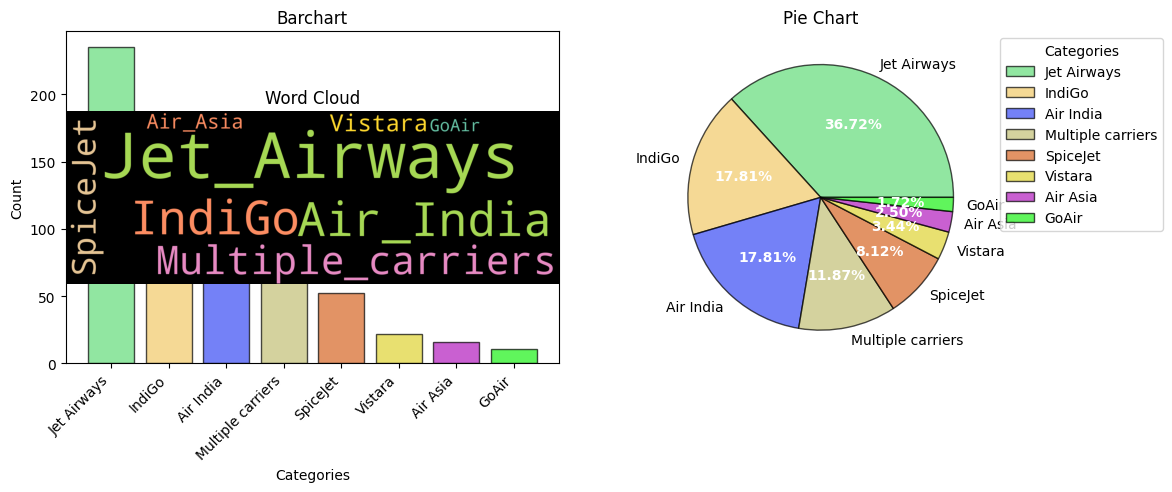

In [45]:
cat_univar_plots(train, "airline")

In [46]:
#  colors = [tuple(np.random.choice(256, size =3)/ 255) for _ in range(len(3)) ]

In [47]:
def get_top_k(data, var, k):
    col = data.loc[:, var].copy()
    cardinality = col.nunique(dropna = True)

    if k >= cardinality:
        raise ValueError(f"Cardinality of {var} is {cardinality}. K must be less than {cardinality}.")

    else:
        top_categories = (
            col
            .value_counts(dropna = True)
            .index[:k]
        )
    data = data.assign(**{
        var: np.where(
            col.isin(top_categories),
            col,
            "other"
        )
    })

    return data

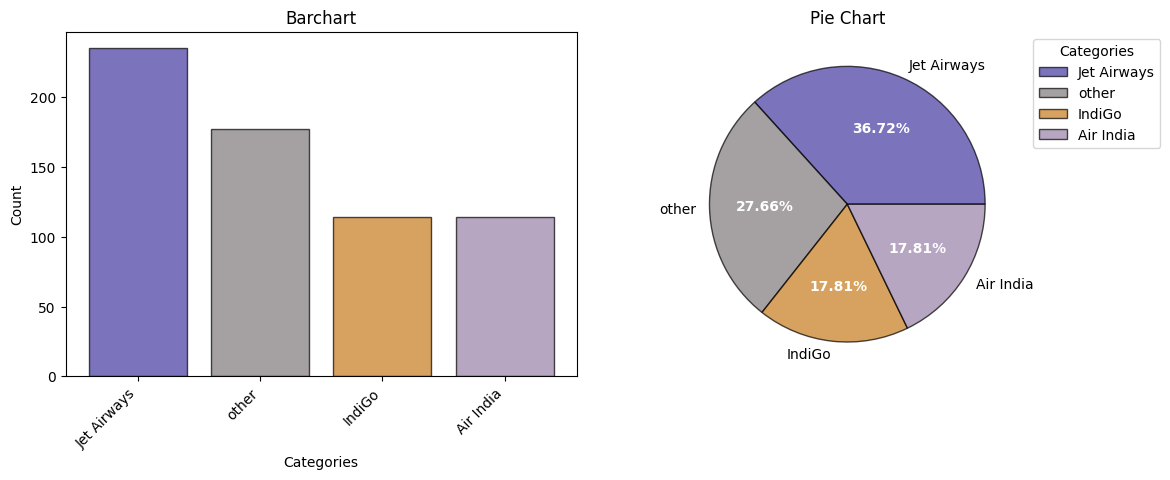

In [48]:
cat_univar_plots(train, "airline", show_wordcloud = False, k = 3)

## Bivariate Analysis

-- Num_cat_bivar plots

In [55]:
def num_cat_bivar_plots(data, num_var, cat_var, k = None, estimator = "mean", orient = "v", order = None, figsize = (15, 4)):
    def get_values(data, num_var, cat_var, estimator, order = None):
        return(
            data
            .groupby(cat_var)
            .agg(estimator, numeric_only = True)
            .loc[:, num_var]
            .dropna()
            .sort_values()
            .reindex(index = order)
        )

    import warnings
    warnings.filterwarnings("ignore")

    display_html(2, f"Bi-variate Analysis between {cat_var} and {num_var}")
    display_html(content = "")

    if k is None:
        temp = get_values(data, num_var, cat_var, estimator, order = order)

    else:
        data = get_top_k(data, cat_var, k = k)
        temp = get_values(data, num_var, cat_var, estimator)

    if orient == "v":
        fig, axes = plt.subplots(1, 3, figsize = figsize)

        bar = sns.barplot(
            x = temp.index,
            y = temp.values,
            color = "#d92b2b",
            ax = axes[0],
            edgecolor = "black",
            alpha = 0.5
        )

        axes[0].set(
            title = "Bar plot",
            xlabel = cat_var,
            ylabel = num_var
        )

        rotate_xlabels(axes[0])


        sns.boxplot(
          data,
          x=cat_var,
          y=num_var,
          color="lightgreen",
          order=temp.index,
          ax=axes[1]
        )
        axes[1].set(
            title="Box Plot",
            xlabel=cat_var,
            ylabel=""
        )
        rotate_xlabels(axes[1])


        # Box plots
        sns.boxplot(
            data,
            x = cat_var,
            y = num_var,
            color = "lightgreen",
            order = temp.index,
            ax = axes[1]
        )

        axes[1].set(
            title = "Box plot",
            xlabel = cat_var,
            ylabel = ""
        )

        rotate_xlabels(axes[1])

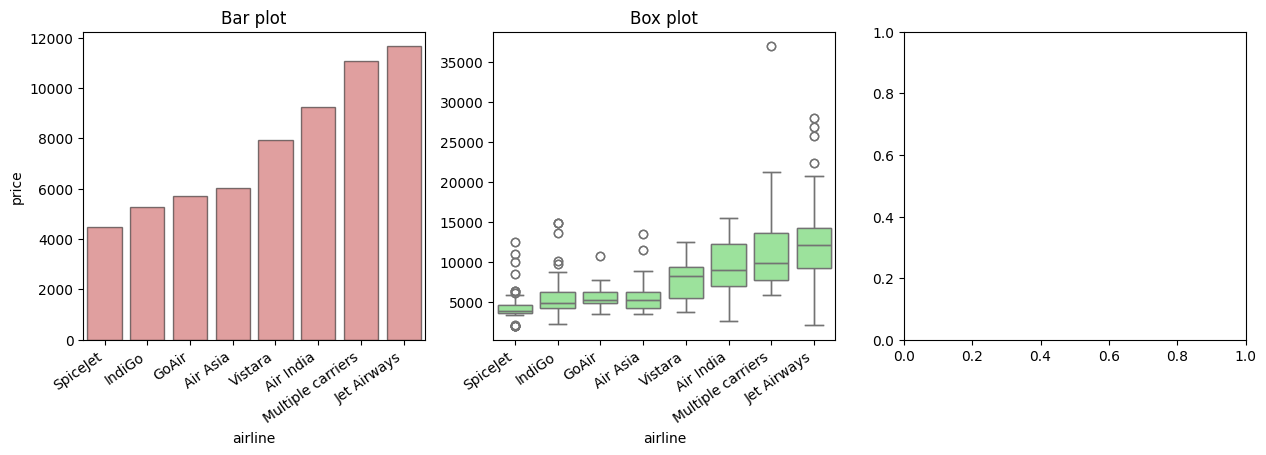

In [54]:
num_cat_bivar_plots(data = train, num_var =  "price", cat_var =  "airline")

In [ ]:
train.price

0       5403
1       5171
2       4174
3       8834
4       7591
       ...  
635     4937
636    13469
637    10261
638     9100
639    16914
Name: price, Length: 640, dtype: int64

## Num-cat hyp testing

In [56]:
def num_cat_hyp_testing(data, num_var, cat_var, alpha = 0.05):
    display_html(2, f"Hypothesis Test for Association between {num_var} and {cat_var}")

    groups_df = (
        data
        .dropna(subset = [num_var])
        .groupby(cat_var)
    )
#     print(groups_df)
    groups = [group[num_var].values for _, group in groups_df]

    anova = stats.f_oneway(*groups)
    statistic = anova[0]
    pvalue = anova[1]
    display_html(3, "Anova Test")
    print(f"-{'Significance Level':21}: {alpha*100}%")
    print(f"-{'Null Hypothesis':21}: The groups have similar population mean")
    print(f"-{'Alternate Hypothesis':21}: The groups dont have similar population mean")
    print(f"-{'Test Statistic':21}: {statistic}")
    print(f"-{'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {num_var} and {cat_var} are associated to each other")


    else:
        print(f"- Since p-value is greater than {alpha}, we fail to reject the Null Hypothesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {num_var} and {cat_var} are not associated to each other")


    kruskal = stats.kruskal(*groups)
    statistic = kruskal[0]
    pvalue = kruskal[1]
    display_html(3, "Krushkal-Wallis Test")
    print(f"-{'Significance Level':21}: {alpha*100}%")
    print(f"-{'Null Hypothesis':21}: The groups have similar population mean")
    print(f"-{'Alternate Hypothesis':21}: The groups dont have similar population mean")
    print(f"-{'Test Statistic':21}: {statistic}")
    print(f"-{'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {num_var} and {cat_var} are associated to each other")


    else:
        print(f"- Since p-value is greater than {alpha}, we fail to reject the Null Hypothesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {num_var} and {cat_var} are not associated to each other")


In [57]:
num_cat_hyp_testing(train, "price", "airline")

-Significance Level   : 5.0%
-Null Hypothesis      : The groups have similar population mean
-Alternate Hypothesis : The groups dont have similar population mean
-Test Statistic       : 57.620759348479254
-p-value              : 9.443961573813296e-64
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: The variables price and airline are associated to each other


-Significance Level   : 5.0%
-Null Hypothesis      : The groups have similar population mean
-Alternate Hypothesis : The groups dont have similar population mean
-Test Statistic       : 292.14600002759767
-p-value              : 2.8747232287493367e-59
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: The variables price and airline are associated to each other


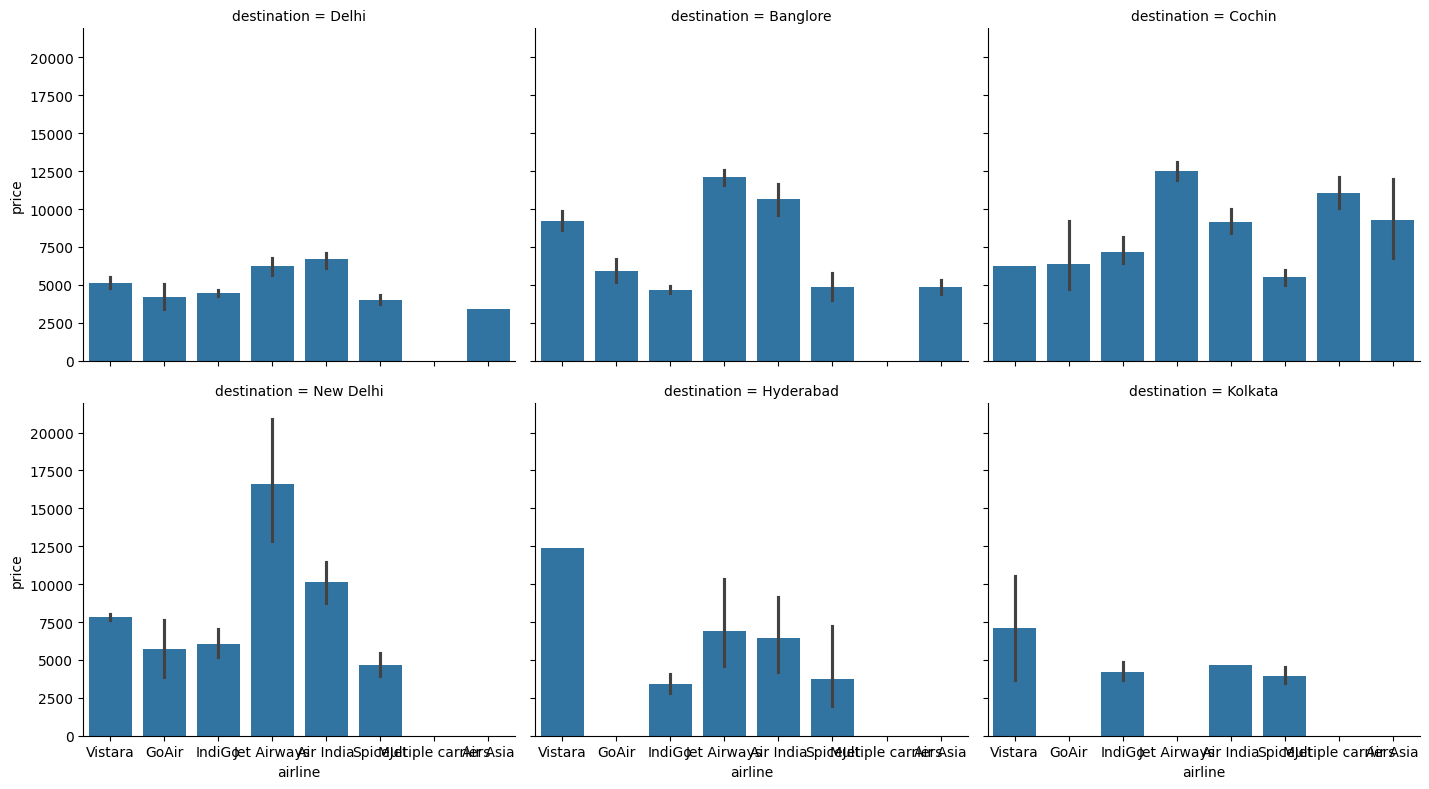

In [58]:
airline_grid = sns.FacetGrid(
        data = train,
        col = "destination",
        col_wrap = 3,
        height = 4,
        aspect = 1.2,
        sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

# for ax in airline_grid.axes[3:]:
#     rotate_xlabels(ax)

## date of journey

In [59]:
train.date_of_journey

0     2019-04-21
1     2019-04-01
2     2019-04-15
3     2019-03-27
4     2019-03-03
         ...    
635   2019-03-03
636   2019-06-06
637   2019-06-01
638   2019-03-27
639   2019-03-09
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

In [60]:
def dt_univar_plots(data, var, target = None, bins = "auto"):
    display_html(3, f"Univariate Plots of {var}")
    col = data.loc[:, var].copy()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

    sns.histplot(data, x = var, bins = bins, color = "#1973bd", ax= ax1)

#     sns.rugplot(data = data, x = var, color = "darkblue", height = 0.035, ax = ax1)

    ax1.set(title = "Histogram")
    rotate_xlabels(ax1)

    sns.lineplot(data = data, x= var, y= target, color = "#d92b2b", ax = ax2)

    rotate_xlabels(ax2)
    ax2.set(title = "line plot")

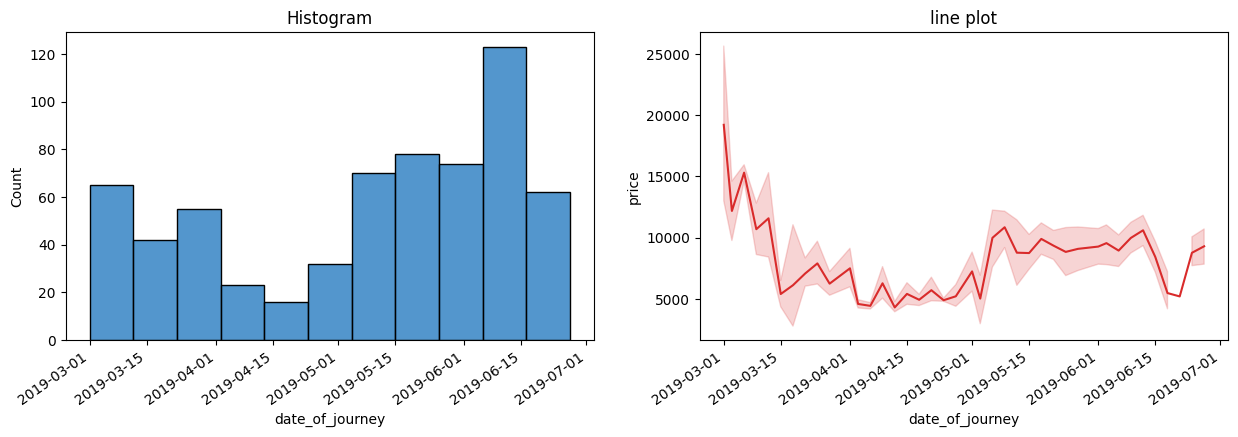

In [61]:
dt_univar_plots(data = train, var = "date_of_journey", target = "price")

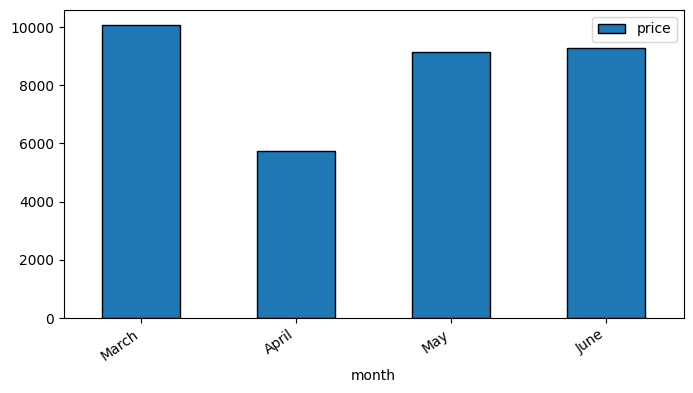

In [62]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = 'M'))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis(index= "month")
    .plot(
        kind ="bar",
        figsize = (8, 4),
        edgecolor = "black"
    )

)

ax = plt.gca()

rotate_xlabels(ax)

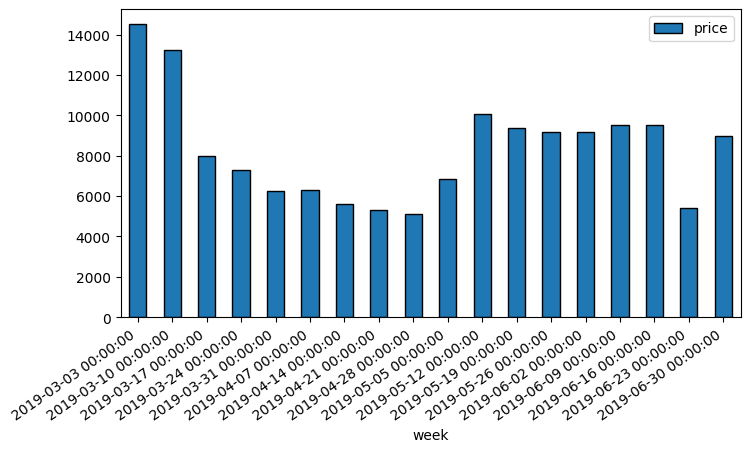

In [63]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = 'W'))
    .price.mean()
    .to_frame()
#     .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis(index= "week")
    .plot(
        kind ="bar",
        figsize = (8, 4),
        edgecolor = "black"
    )

)

ax = plt.gca()

rotate_xlabels(ax)

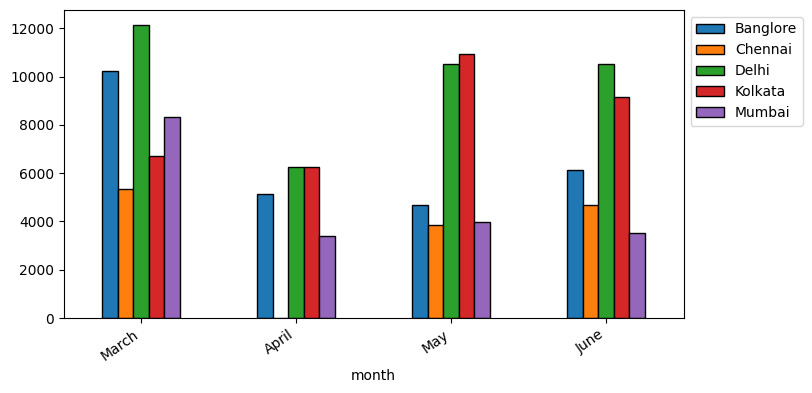

In [64]:
(
    train
    .groupby([pd.Grouper(key = "date_of_journey", freq = 'M'), "source"])
    .price.mean()
    .unstack(fill_value = 0)
#     .to_frame()
    .set_axis(["March", "April", "May", "June"], axis = 0)
    .rename_axis(index= "month")
    .plot(
        kind ="bar",
        figsize = (8, 4),
        edgecolor = "black"
    )

)

ax = plt.gca()

ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1, 1)
)

rotate_xlabels(ax)

# Dep_time

In [65]:
train.dep_time

0     2024-06-04 11:30:00
1     2024-06-04 16:40:00
2     2024-06-04 15:30:00
3     2024-06-04 19:10:00
4     2024-06-04 06:10:00
              ...        
635   2024-06-04 21:05:00
636   2024-06-04 09:35:00
637   2024-06-04 08:45:00
638   2024-06-04 07:30:00
639   2024-06-04 05:25:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

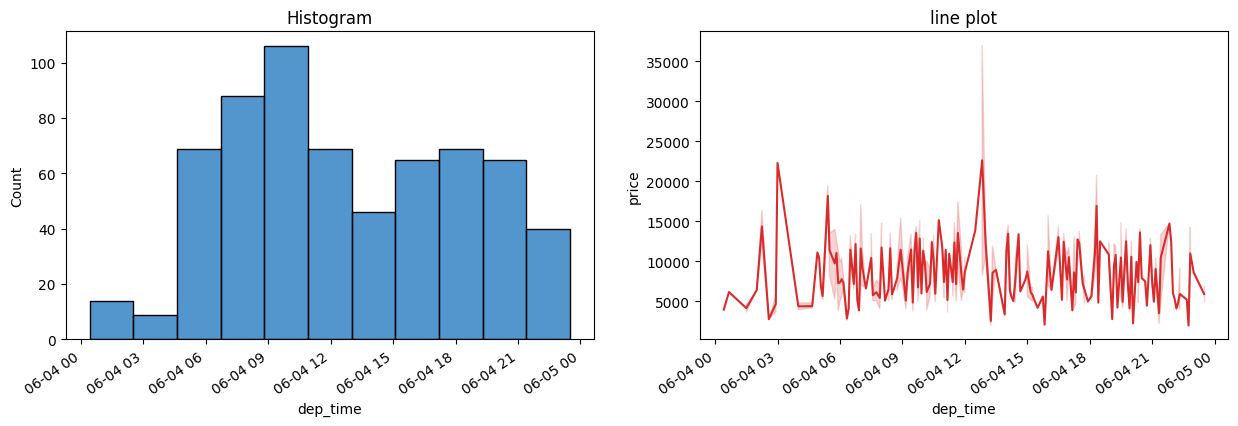

In [66]:
dt_univar_plots(train, "dep_time", "price")

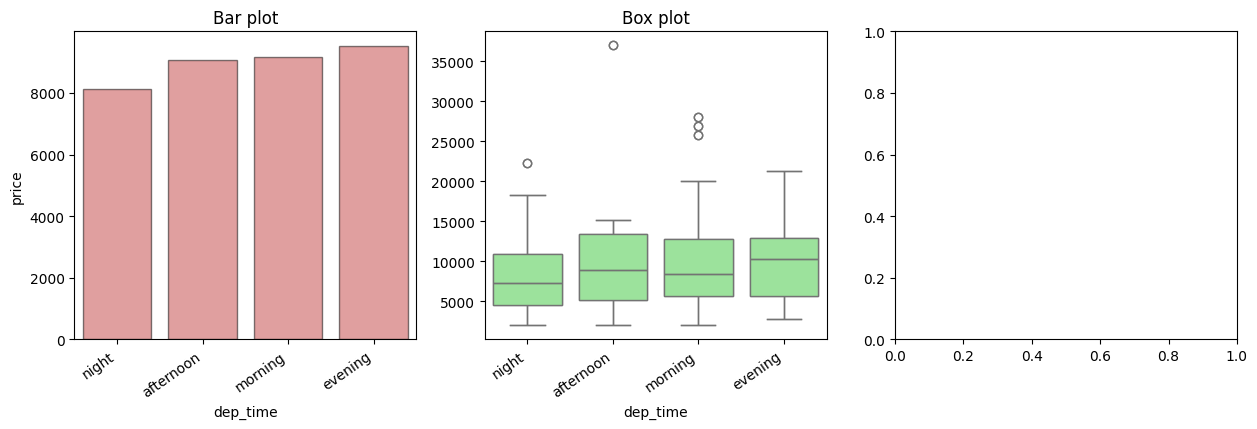

In [67]:
(
    train
    .assign(dep_time = lambda df_:(
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive = "left"),
                  df_.dep_time.dt.hour.between(12, 16, inclusive = "left"),
                  df_.dep_time.dt.hour.between(16, 20, inclusive = "left")],
                 ["morning", "afternoon", "evening"],
                 default = "night")
    ))
    .pipe(num_cat_bivar_plots, "price", "dep_time")
)

# Duration

In [ ]:
train.duration

0       170
1       455
2       155
3      1475
4       165
       ... 
635      80
636     690
637     630
638     705
639    1380
Name: duration, Length: 640, dtype: int64

In [68]:
def num_summary(data, var):
    import warnings
    warnings.filterwarnings("ignore")

    col = data.loc[:, var].copy()
    display_html(3, "Quick Glance")
    display(col)

    display_html(3, "Meta-data:")
    print(f"{'Data type':15}: {col.dtype}")
    print(f"{'Missing data':15}: {col.isna().sum():,} rows({col.isna().mean()*100:.2f}%)")
    print(f"{'Available Data':15}: {col.count():,}/{len(col):,} rows")

    display_html(3, "Percentile")
    display(
        col
        .quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 1.0])
        .rename(index = lambda val: f"{val * 100:.0f}")
        .rename("value")
        .rename_axis(index = "percentile")
        .to_frame()
    )

    display_html(3, "Measure of spread:")
    std = col.std()
    iqr = col.quantile(0.75) - col.quantile(0.25)
    display(
        pd
        .Series({
            "var": col.var(),
            "std": std,
            "IQR": iqr,
            "mad": stats.median_abs_deviation(col.dropna()),
            "coef_variance": std/col.mean()
        })
        .rename("value")
        .to_frame()
    )

    display_html(3, "Skewness and Kurtosis: ")
    display(
        pd
        .Series({
            "skewness": col.skew(),
            "kurtosis": col.kurtosis()
        })
        .rename("value")
        .to_frame()
    )

    alpha = 0.05

    display_html(4, "Hypothesis testing for Normality:")
    display_html(4, 'Shapiro-Wilk Test:')
    sw_test = stats.shapiro(col.dropna().values)
    sw_statistics = sw_test.statistic
    sw_pvalue = sw_test.pvalue

    print(f"{'SIgnificance level':21}: {alpha}")
    print(f"{'Null Hypothesis':21}: The data is normally distributed")
    print(f"-{'Alternate Hypothesis':21}: The data is not normally distributed")
    print(f"-{'Test Statistic':21}: {sw_statistics}")
    print(f"-{'p-value':21}: {sw_pvalue}")
    if sw_pvalue < alpha:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: we conclude that the data sample is normally distributed")


    else:
        print(f"- Since p-value is greater than {alpha}, we fail to reject the Null Hypothesis at {alpha*100}% significance level")
        print(f"- Conclusion: we conclude that the data sample is normally distributed")


#     display_html(4, "Hypothesis testing for Normality:")
    display_html(4, 'Anderson Darling Test:')
    ad_test = stats.anderson(col.dropna().values, dist = "norm")
    ad_statistics = ad_test.statistic
    ad_critical = ad_test.critical_values[2]

    print(f"{'SIgnificance level':21}: {alpha}")
    print(f"{'Null Hypothesis':21}: The data is normally distributed")
    print(f"-{'Alternate Hypothesis':21}: The data is not normally distributed")
    print(f"-{'Test Statistic':21}: {ad_statistics}")
    print(f"-{'critical value':21}: {ad_critical}")
    if ad_statistics >= ad_critical:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: we conclude that the data sample is normally distributed")


    else:
        print(f"- Since p-value is greater than {alpha}, we fail to reject the Null Hypothesis at {alpha*100}% significance level")
        print(f"- Conclusion: we conclude that the data sample is normally distributed")


In [69]:
num_summary(train, "duration")

0       170
1       455
2       155
3      1475
4       165
       ... 
635      80
636     690
637     630
638     705
639    1380
Name: duration, Length: 640, dtype: int64

Data type      : int64
Missing data   : 0 rows(0.00%)
Available Data : 640/640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,490.00
75,916.25
90,1452.00
95,1615.00
99,2193.20


,value
var,265972.525186
std,515.725242
IQR,746.250000
mad,320.000000
coef_variance,0.813186


,value
skewness,0.962560
kurtosis,0.077102


SIgnificance level   : 0.05
Null Hypothesis      : The data is normally distributed
-Alternate Hypothesis : The data is not normally distributed
-Test Statistic       : 0.8777210712432861
-p-value              : 5.101435994142e-22
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: we conclude that the data sample is normally distributed


SIgnificance level   : 0.05
Null Hypothesis      : The data is normally distributed
-Alternate Hypothesis : The data is not normally distributed
-Test Statistic       : 25.812942020855644
-critical value       : 0.782
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: we conclude that the data sample is normally distributed


In [70]:
train.duration.quantile([0.25, 0.50, 0.75])

0.25    170.00
0.50    490.00
0.75    916.25
Name: duration, dtype: float64

In [102]:
def num_univar_plots(data, var, bins = 10, figsize = (15, 7)):
    display_html(2, f"Univariate Analysis of {var}")
    display_html(content = "")
    col = data.loc[:, var].copy()

    fig, ax = plt.subplots(2, 3, figsize = figsize)
#     print(ax[0])
    ax = ax.ravel()

    sns.histplot(
        data,
        x = var,
        bins = bins,
        kde = True,
        color = "#1973bd",
        ax = ax[0]
    )

    sns.rugplot(
        data,
        x = var,
        color = "black",
        height = 0.035,
        ax = ax[0]
    )
    ax[0].set(title = "Histogram")

    sns.ecdfplot(
        data,
        x = var,
        ax = ax[1],
        color = "red"
    )
    ax[1].set(title = "CDF")


    # power_transform
    data = data.assign(**{
        f"{var}_pwt" : (
            PowerTransformer()
            .fit_transform(data.loc[:, [var]])
            .ravel()
        )
    })

    sns.kdeplot(
        data,
        x = f"{var}_pwt",
        color = "green",
        ax = ax[2]
    )

    sns.rugplot(
        data,
        x=f"{var}_pwt",
        color = "black",
        height = 0.035,
        ax = ax[2]
    )
    ax[2].set(title = "Power Transformer")

    sns.boxplot(
        data,
        x = var,
        color = "#4cd138",
        ax = ax[3]
    )
    ax[3].set(title = "Box Plot")

    sns.violinplot(
        data,
        x = var,
        color = "#4cd138",
        ax = ax[4]
    )
    ax[4].set(title = "Violin Plot")

    sm.qqplot(
        col.dropna(),
        line = "45",
        fit = True,
        ax = ax[5]
    )
    ax[5].set(title = "QQ-plot")

    plt.tight_layout()

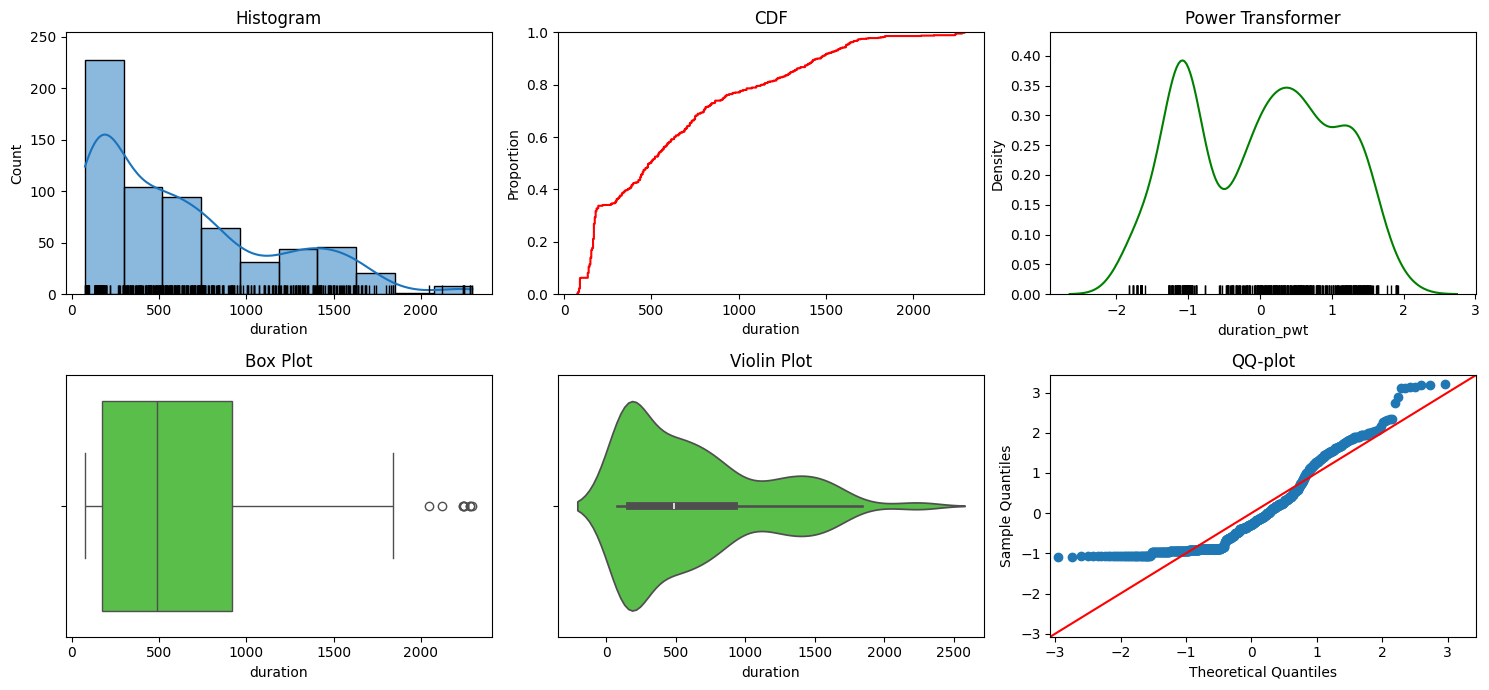

In [103]:
num_univar_plots(train, "duration")

In [111]:
def num_bivar_plots(data, var_x, var_y, figsize = (12, 4.5), scatter_kwargs = dict(), hexbin_kwargs = dict()):
    display_html(2,f"Bi-variate analysis between {var_x} and {var_y} ")
    display_html(content = "")

    fig, axes = plt.subplots(1, 2, figsize = figsize)

    sns.scatterplot(
        data,
        x = var_x,
        y = var_y,
        ax = axes[0],
        edgecolors = "black",
        **scatter_kwargs
    )
    axes[0].set(title = "Scatter plot")

    # hexbin

    col_x = data.loc[:, var_x]
    col_y = data.loc[:, var_y]
    hexbin = axes[1].hexbin(
        x = col_x,
        y = col_y,
        **hexbin_kwargs
    )
    axes[1].set(
        title = "Hexbin Plots",
        xlabel = var_x,
        xlim = (col_x.min(), col_x.max()),
        ylim = (col_y.min(), col_y.max())
    )

    cb = plt.colorbar(
        hexbin,
        label = "Count"
    )

    plt.tight_layout()
    plt.show()


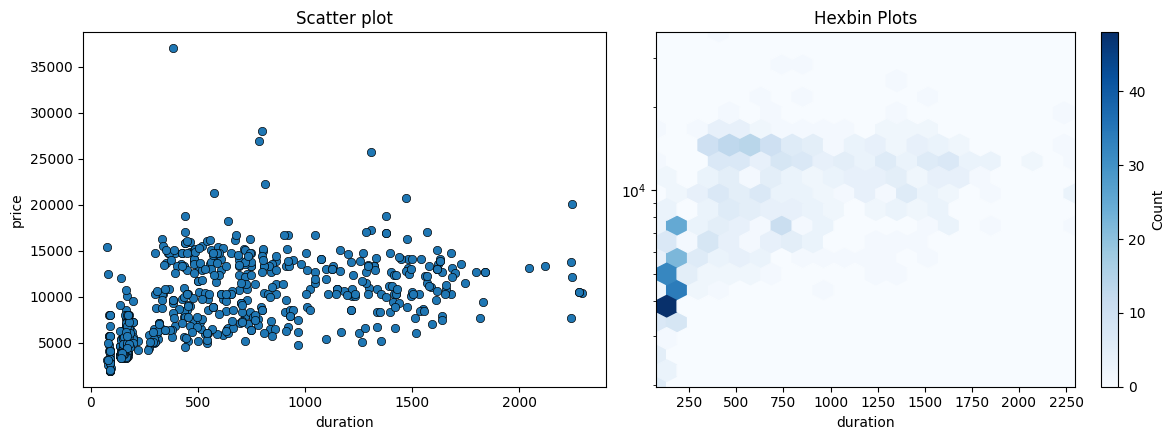

In [112]:
num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs = dict(
        yscale = "log",
        gridsize = 20,
        cmap = "Blues"
    )
)

In [113]:
def num_num_hyp_testing(data, var1, var2, alpha = 0.05):
    display_html(2, f"Hypothesis for Association between {var1} and {var2}")

    temp = (
        data
        .dropna(subset=[var1, var2], how = "any")
        .copy()
    )

    pearson = stats.pearsonr(temp[var1].values, temp[var2].values)
    statistic = pearson.statistic
    pvalue = pearson.pvalue
    display_html(3, "Pearson Test")
    print(f"-{'Significance Level':21}: {alpha*100}%")
    print(f"-{'Null Hypothesis':21}: The samples of uncorrelated")
    print(f"-{'Alternate Hypothesis':21}: The samples are correlated")
    print(f"-{'Test Statistic':21}: {statistic}")
    print(f"-{'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {var1} and {var2} are correlated")


    else:
        print(f"-Since p-value is greater than {alpha}, we fail to reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {var1} and {var2} are not correlated")



    spearman = stats.spearmanr(temp[var1].values, temp[var2].values)
    statistic = spearman.statistic
    pvalue = spearman.pvalue
    display_html(3, "spearman Test")
    print(f"-{'Significance Level':21}: {alpha*100}%")
    print(f"-{'Null Hypothesis':21}: The samples of uncorrelated")
    print(f"-{'Alternate Hypothesis':21}: The samples are correlated")
    print(f"-{'Test Statistic':21}: {statistic}")
    print(f"-{'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"-Since p-value is less than {alpha}, we reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {var1} and {var2} are correlated")


    else:
        print(f"-Since p-value is greater than {alpha}, we fail to reject the Null Hypthesis at {alpha*100}% significance level")
        print(f"- Conclusion: The variables {var1} and {var2} are not correlated")



In [115]:
num_num_hyp_testing(train, "price", "duration")

-Significance Level   : 5.0%
-Null Hypothesis      : The samples of uncorrelated
-Alternate Hypothesis : The samples are correlated
-Test Statistic       : 0.5208040784786756
-p-value              : 8.829504996126742e-46
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: The variables price and duration are correlated


-Significance Level   : 5.0%
-Null Hypothesis      : The samples of uncorrelated
-Alternate Hypothesis : The samples are correlated
-Test Statistic       : 0.6800680171598346
-p-value              : 4.5570585430470293e-88
-Since p-value is less than 0.05, we reject the Null Hypthesis at 5.0% significance level
- Conclusion: The variables price and duration are correlated


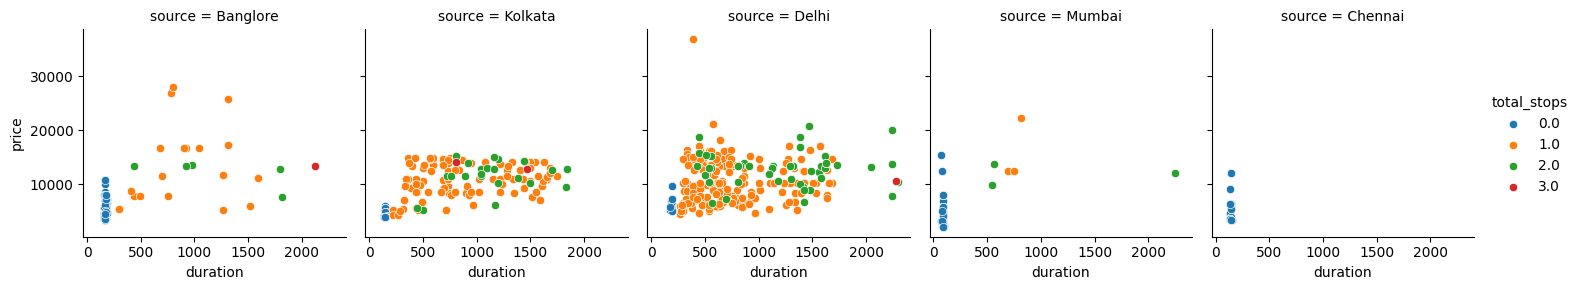

In [116]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    hue = "total_stops",
    sharey = True
)

duration_grid.map(sns.scatterplot, "duration", "price")
duration_grid.add_legend()

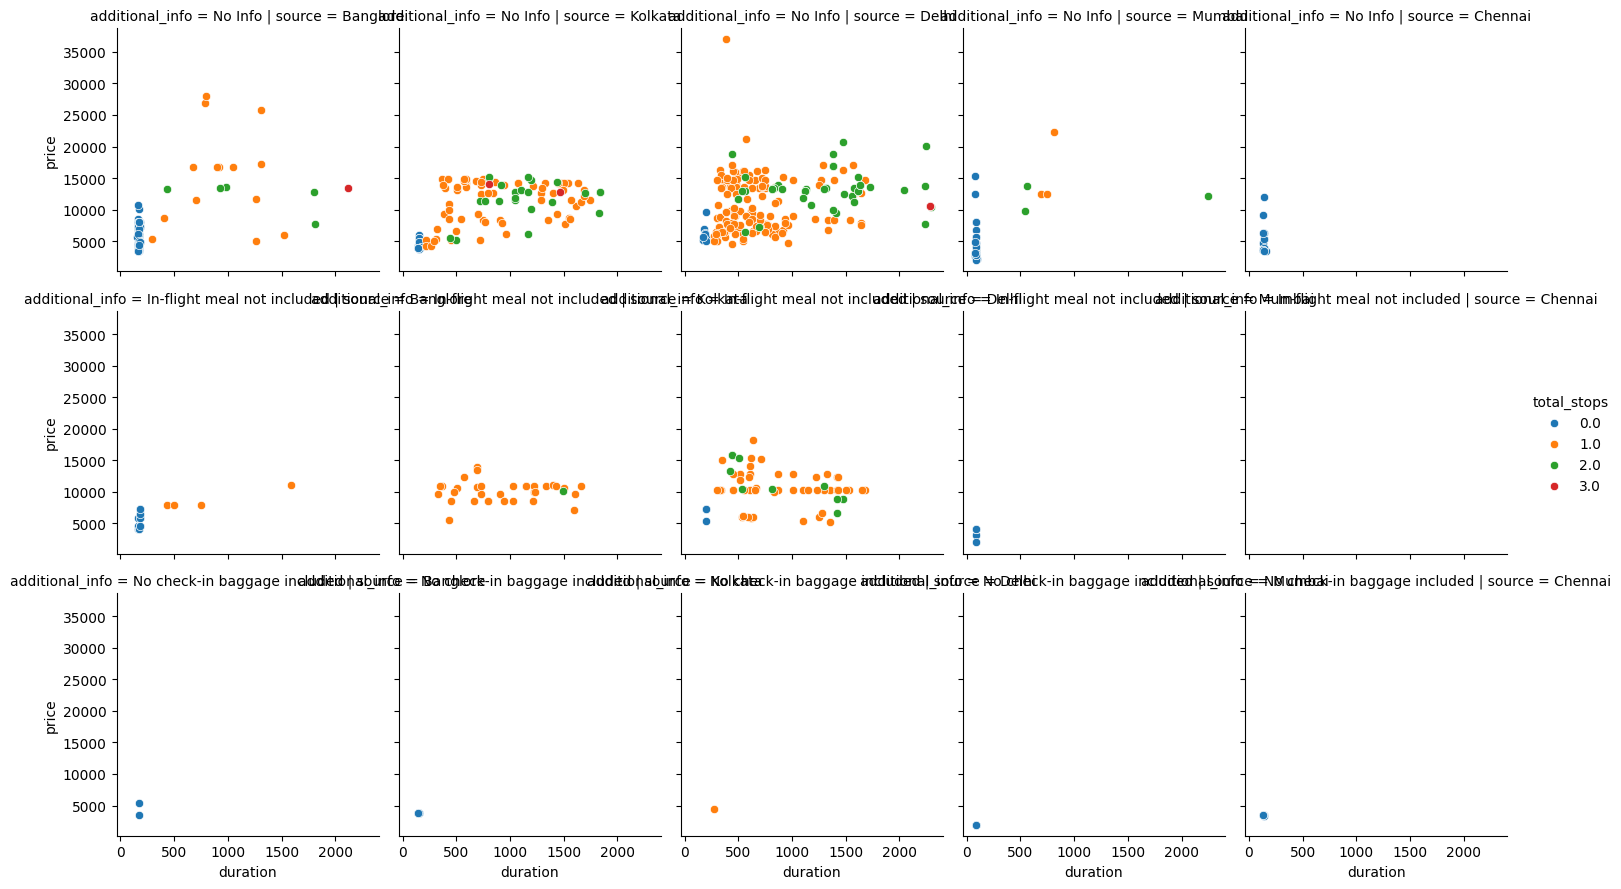

In [118]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    row ="additional_info",
    hue = "total_stops",
    sharey = True
)

duration_grid.map(sns.scatterplot, "duration", "price")
duration_grid.add_legend()

In [119]:
def get_iqr_outliers(data, var, band = 1.5):
    q1, q3 =(
        data
        .loc[:, var]
        .quantile([0.25, 0.75])
        .values
    )

    iqr = q3 - q1
    lower_limit = q1 - (band * iqr)
    upper_limit = q3 - (band * iqr)

    display_html(3, f"{var} - IQR Limits:")
    print(f"{'Lower Limit':21}: {lower_limit}")
    print(f"{'Upper Limit':21}: {upper_limit}")

    return(
        data
        .query(f"{var}> @upper_limit | {var} < @lower_limit")
        .sort_values(var)
    )

In [121]:
get_iqr_outliers(train, "duration")

Lower Limit          : -949.375
Upper Limit          : -203.125


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
174,Air India,2019-05-01,Mumbai,Hyderabad,2024-06-04 19:30:00,2024-06-04 20:45:00,75,0.0,No Info,3100
176,Air India,2019-03-01,Mumbai,Hyderabad,2024-06-04 19:30:00,2024-06-04 20:45:00,75,0.0,No Info,15385
635,Air India,2019-03-03,Mumbai,Hyderabad,2024-06-04 21:05:00,2024-06-04 22:25:00,80,0.0,No Info,4937
381,Air India,2019-03-27,Mumbai,Hyderabad,2024-06-04 06:20:00,2024-06-04 07:40:00,80,0.0,No Info,2575
34,SpiceJet,2019-03-01,Mumbai,Hyderabad,2024-06-04 05:45:00,2024-06-04 07:05:00,80,0.0,No Info,12475
...,...,...,...,...,...,...,...,...,...,...
346,Air India,2019-03-12,Mumbai,Hyderabad,2024-06-04 06:00:00,2024-06-04 19:25:00,2245,2.0,No Info,12119
399,Jet Airways,2019-03-03,Delhi,Cochin,2024-06-04 05:25:00,2024-06-04 18:50:00,2245,2.0,No Info,20064
572,Air India,2019-06-03,Delhi,Cochin,2024-06-04 05:15:00,2024-06-04 19:15:00,2280,3.0,No Info,10493
620,Air India,2019-05-27,Delhi,Cochin,2024-06-04 05:15:00,2024-06-04 19:15:00,2280,3.0,No Info,10493


In [137]:
def cat_summary(data, var):
    import warnings
    warnings.filterwarnings("ignore")

    col = data.loc[:, var].copy()
    display_html(2, var)

    display_html(3, "Quick Glance")
    display(col)

    display_html(3, "Meta-data: ")
    print(f"{'Data type':15}: {col.dtype}")
    print(f"{'Cardinality':15}: {col.nunique(dropna = True)} categories")
    print(f"{'Missing data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available data':15}: {col.count():,} / {len(col):,} rows")

    display_html(3, "Summary:")
    display(
        col
        .describe()
        .rename("")
        .to_frame()
    )

    display_html(3, "Catgories Distribution")
    with pd.option_context("display.max_rows", None):
        display(
            col
            .value_counts()
            .pipe(lambda ser: pd.concat(
                [
                    ser,
                    col.value_counts(normalize = True)
                ],
                axis = 1
            ))
            .set_axis(["count", "percentage"], axis = 1)
            .rename_axis(index= "category")
        )

In [138]:

cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4                          No Info
                  ...             
635                        No Info
636    In-flight meal not included
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data type      : object
Cardinality    : 3 categories
Missing data   : 0 rows (0.00 %)
Available data : 640 / 640 rows


,
count,640
unique,3
top,No Info
freq,499


,count,percentage
category,,
No Info,499,0.779687
In-flight meal not included,123,0.192188
No check-in baggage included,18,0.028125


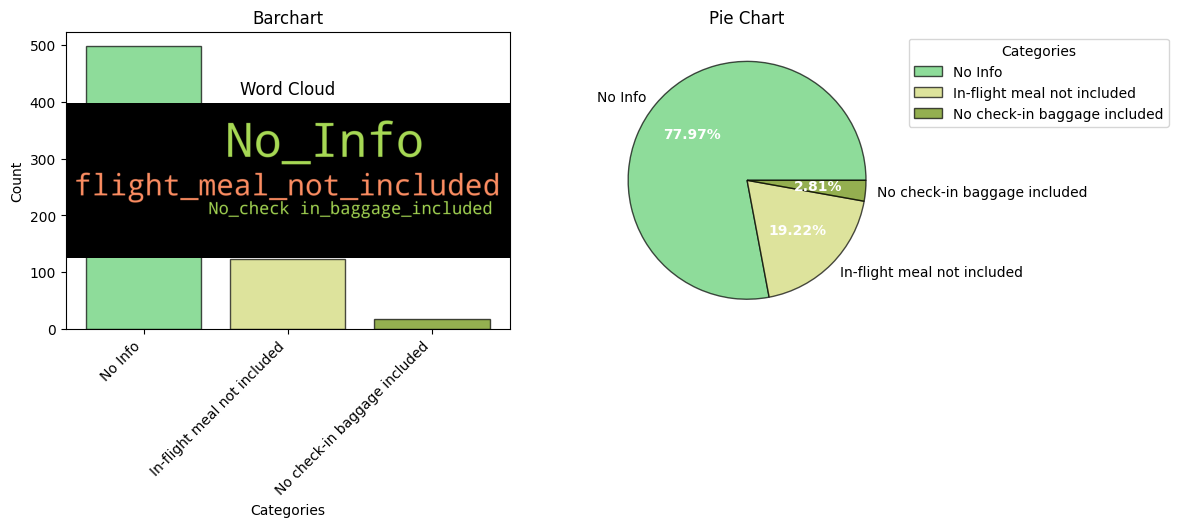

In [140]:
cat_univar_plots(train, "additional_info")

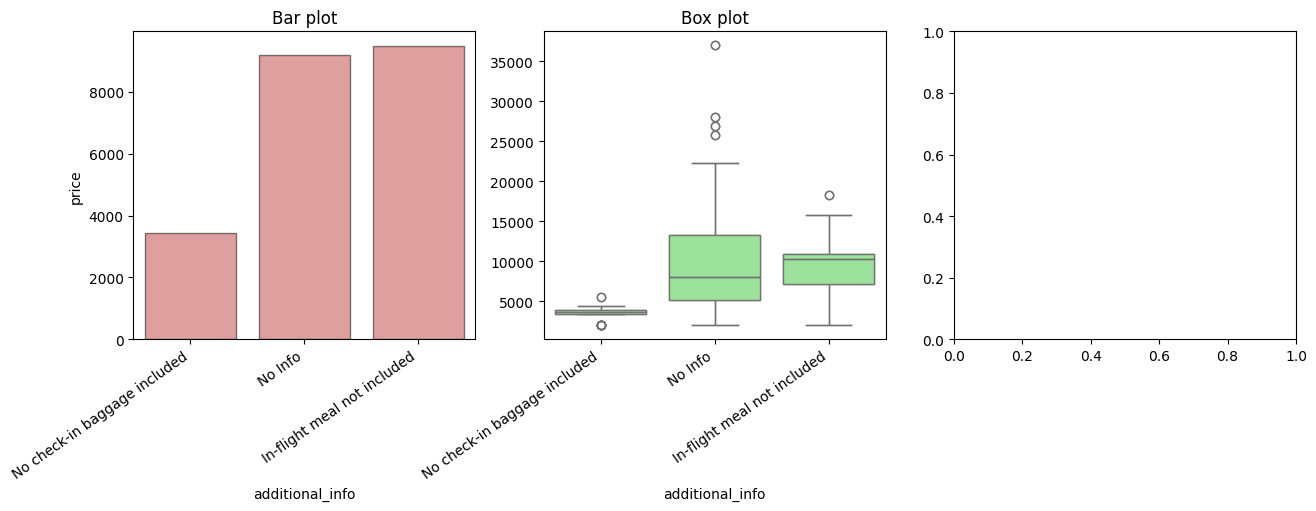

In [142]:
num_cat_bivar_plots(train, "price", "additional_info")

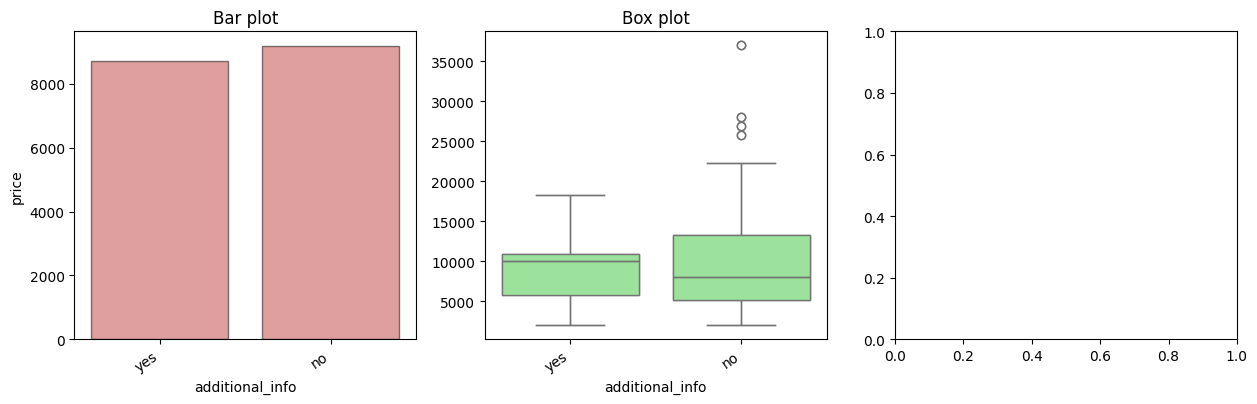

In [144]:
(
    train
    .assign(additional_info = (
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
    ))
    .pipe(num_cat_bivar_plots, "price", "additional_info")

)